In [43]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
df=pd.read_csv('C:\\Users\\HP\\Desktop\\mhmd.ai\\creditcard-unsupervised-fraud\\data\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


we delete the time column since it is unusable this information dont make since 

In [ ]:
df = df.drop(columns=['Time'])

In [ ]:
df.shape

(284807, 30)

In [ ]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null data and we will check if there is dublicated data 

In [ ]:

df.duplicated().sum()

np.int64(9144)

In [ ]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284708,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284751,2.050734,-0.364010,-2.542843,-0.729357,2.388455,3.318015,-0.479138,0.791559,0.403374,0.093232,...,-0.293363,-0.834802,0.381740,0.698179,-0.264798,0.219275,-0.052131,-0.066940,0.89,0
284775,1.955547,-0.724606,-1.706511,-0.611145,1.710907,3.914215,-1.248690,1.054133,1.314064,-0.150553,...,0.193605,0.690196,0.155951,0.726775,-0.061219,-0.192666,0.060347,-0.042323,12.99,0
284785,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0


We should remove the dublicated data and keep only one row from each dublication 

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(275663, 30)

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,90.578380,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,253.213954,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,6.300000,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,23.740000,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,79.910000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     275663 

In [ ]:
# Create the scaler
scaler = StandardScaler()

# Replace the Amount column with its scaled version
df["Amount"] = scaler.fit_transform(df[["Amount"]])

C:\Users\HP\AppData\Local\Temp\ipykernel_25428\4121797943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"] = scaler.fit_transform(df[["Amount"]])


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,2.756630e+05,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,3.299299e-17,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.000002e+00,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-3.577155e-01,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-3.328353e-01,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-2.639606e-01,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-4.213196e-02,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.011028e+02,1.000000


In [ ]:
X = df.drop(columns=["Class"])
y = df["Class"]  # keep for evaluation


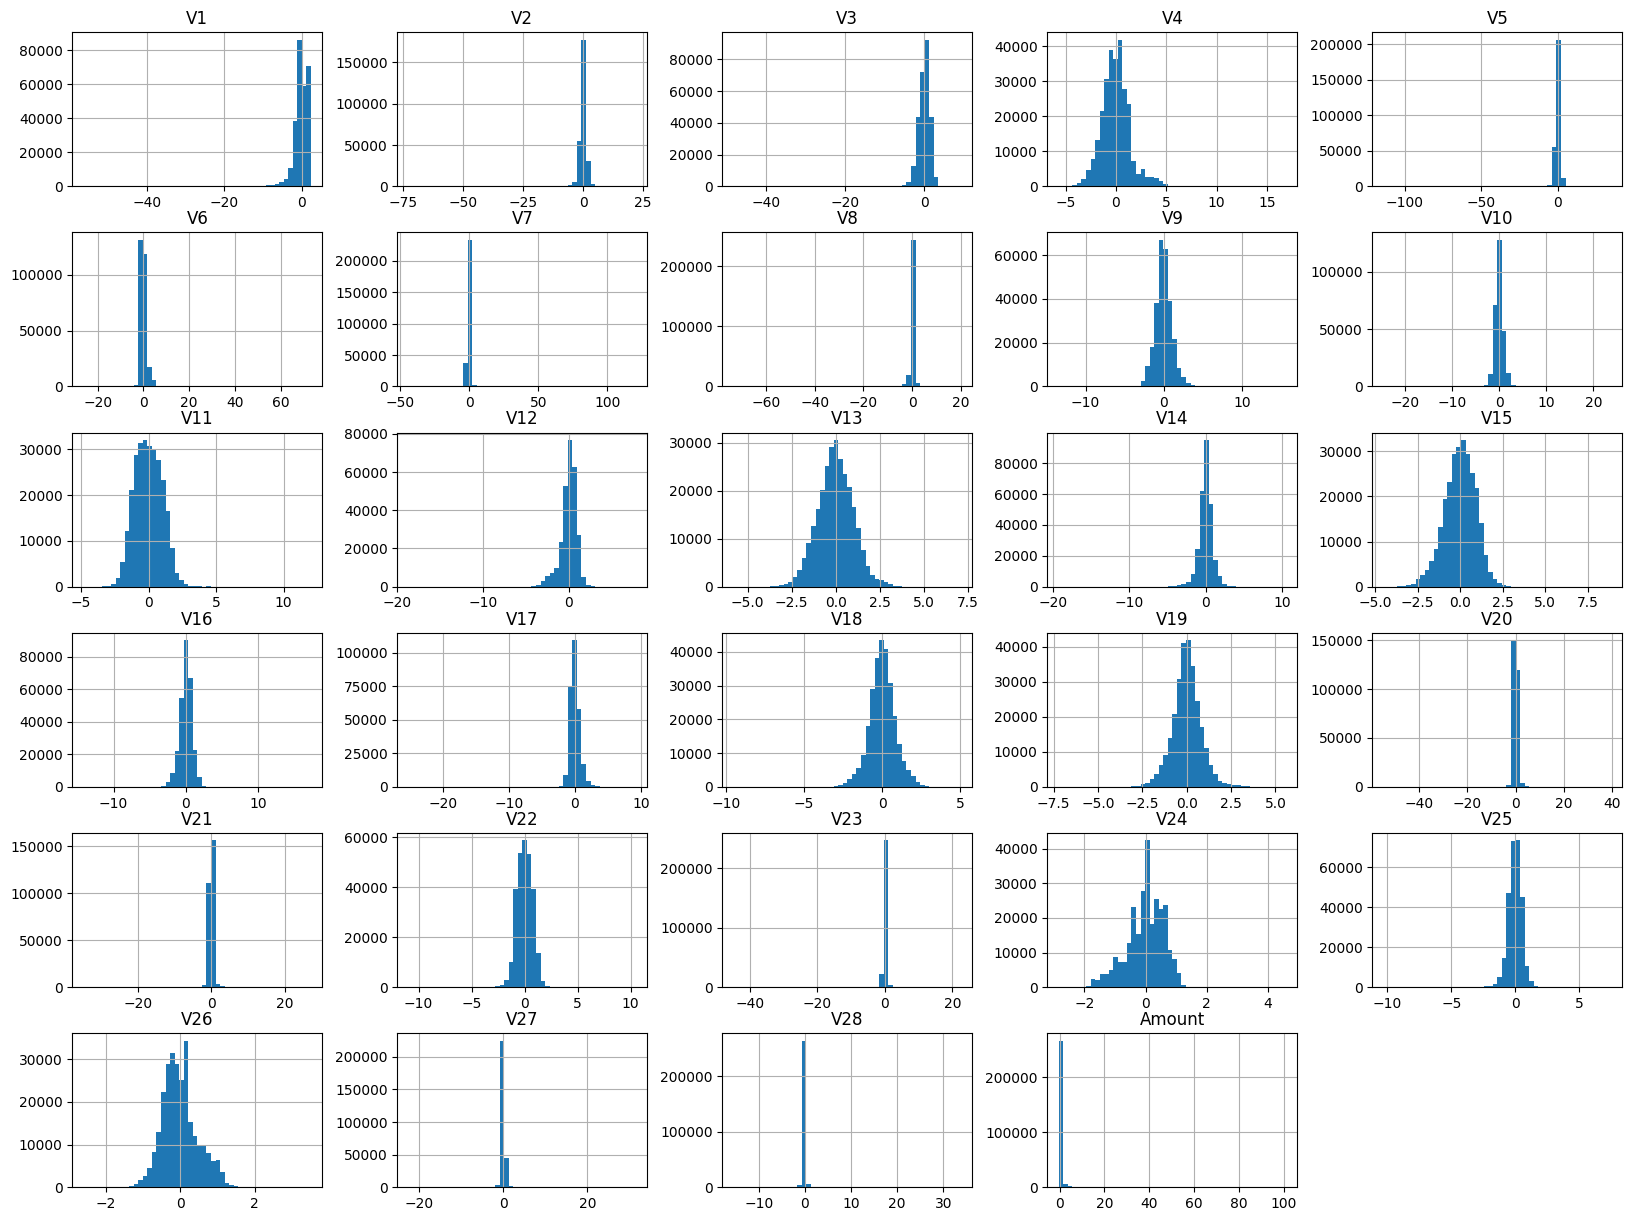

In [ ]:
# Histogram for all features
X.hist(bins=50, figsize=(20,15))
plt.show()



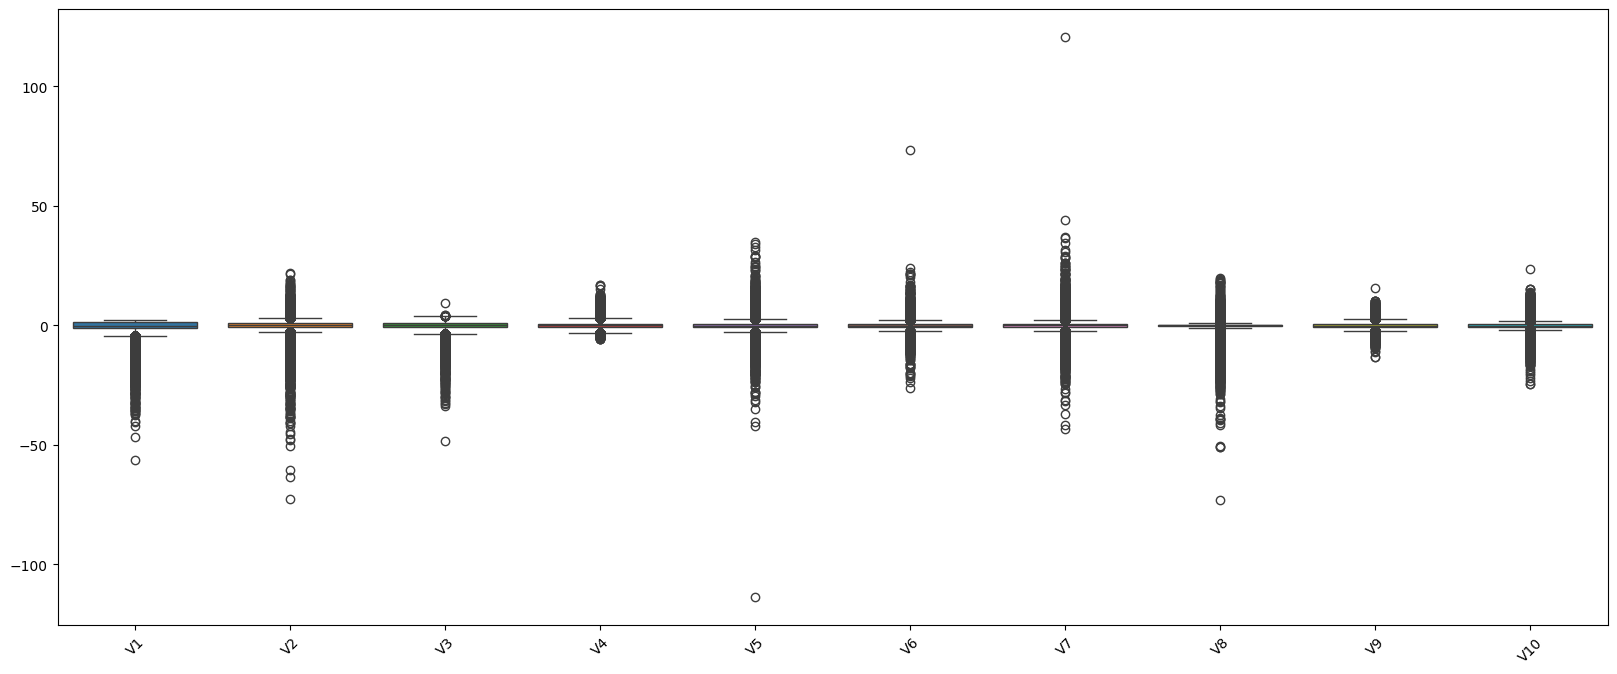

In [ ]:
# Boxplots for outlier detection 
plt.figure(figsize=(20,8))
sns.boxplot(data=X.iloc[:, :10])
plt.xticks(rotation=45)
plt.show()

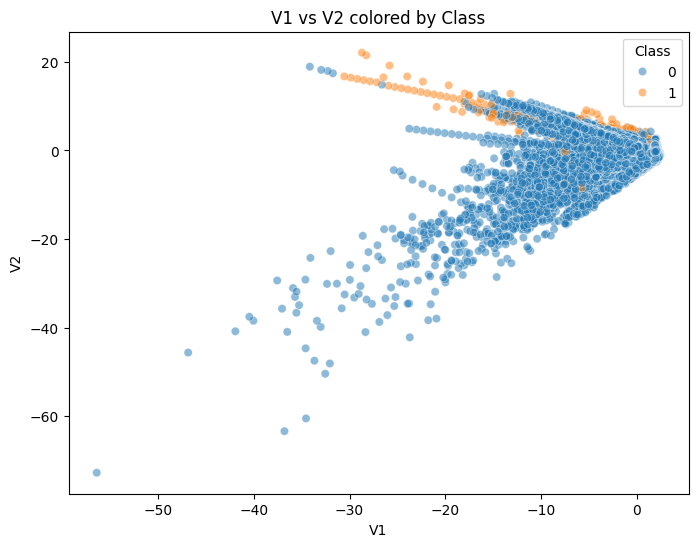

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X["V1"], y=X["V2"], hue=df["Class"], alpha=0.5)
plt.title("V1 vs V2 colored by Class")
plt.show()

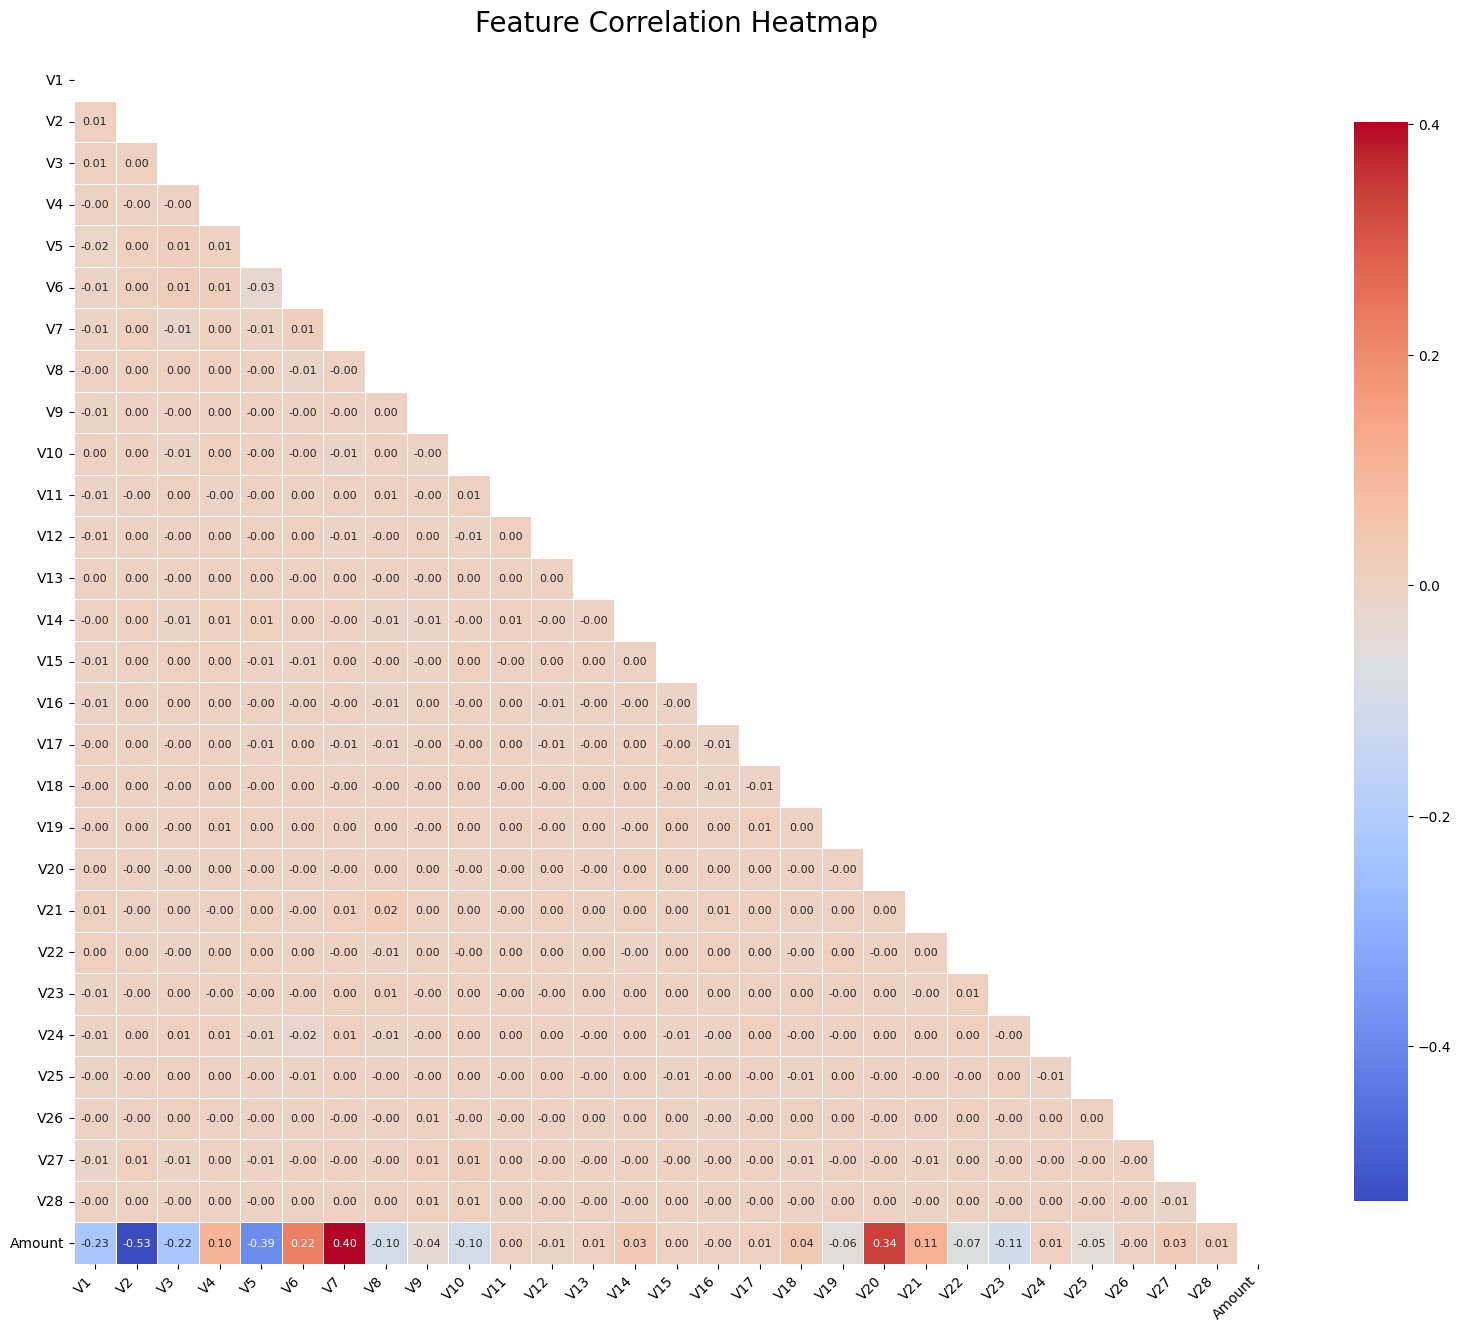

In [30]:
# Compute the correlation matrix
corr = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16,14))

# Generate a mask for the upper triangle (to remove duplicate info)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap
sns.heatmap(
    corr, 
    mask=mask,                   # hide upper triangle
    cmap='coolwarm',             # nice diverging color map
    annot=True,                  # show correlation values
    fmt=".2f",                   # 2 decimal places
    linewidths=0.5,              # lines between cells
    cbar_kws={"shrink": 0.8},   # color bar size
    square=True,                 # make cells square
    annot_kws={"size":8}         # annotation font size
)

plt.title("Feature Correlation Heatmap", fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [34]:
pca = PCA(n_components=2)  # reduce to 2D for plotting
X_pca = pca.fit_transform(X)

In [37]:
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Class"] = df["Class"].values

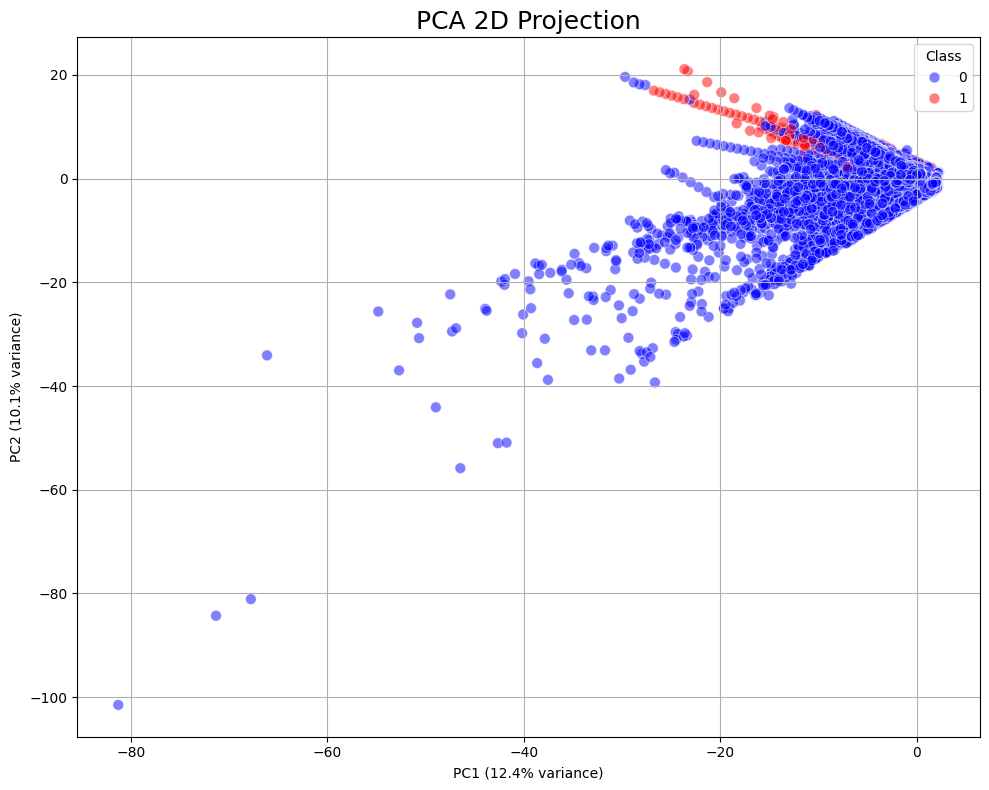

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Class",
    palette={0: "blue", 1: "red"},
    data=pca_df,
    alpha=0.5,  # makes points transparent for overlap
    s=60        # point size
)

plt.title("PCA 2D Projection", fontsize=18)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="Class", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
pca_df.describe()



,PC1,PC2,Class
count,2.756630e+05,2.756630e+05,275663.000000
mean,1.360961e-17,-2.474474e-18,0.001716
std,1.982508e+00,1.787223e+00,0.041388
min,-8.130436e+01,-1.015039e+02,0.000000
25%,-6.864731e-01,-8.579044e-01,0.000000
50%,1.066575e-01,-2.795700e-02,0.000000
75%,1.291546e+00,1.069616e+00,0.000000
max,2.287440e+00,2.110867e+01,1.000000


In [44]:
X = df.drop(columns="Class")  # features
y_true = df["Class"]           # labels for evaluation only

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
contamination_rate = y_true.mean()  # approx 0.17% for credit card fraud

model = IsolationForest(
    n_estimators=200,       # number of trees
    max_samples='auto',     # use all samples
    contamination=contamination_rate,
    random_state=42,
    verbose=0
)

model.fit(X_scaled)


,n_estimators,200
,max_samples,'auto'
,contamination,np.float64(0....8632097887638)
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [46]:
# IsolationForest predicts: 1 = normal, -1 = anomaly
y_pred = model.predict(X_scaled)

# Convert to 0/1 (0 = normal, 1 = anomaly)
y_pred = [0 if x == 1 else 1 for x in y_pred]

In [47]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    275190
           1     0.2199    0.2199    0.2199       473

    accuracy                         0.9973    275663
   macro avg     0.6093    0.6093    0.6093    275663
weighted avg     0.9973    0.9973    0.9973    275663

ROC-AUC: 0.6092661291790942


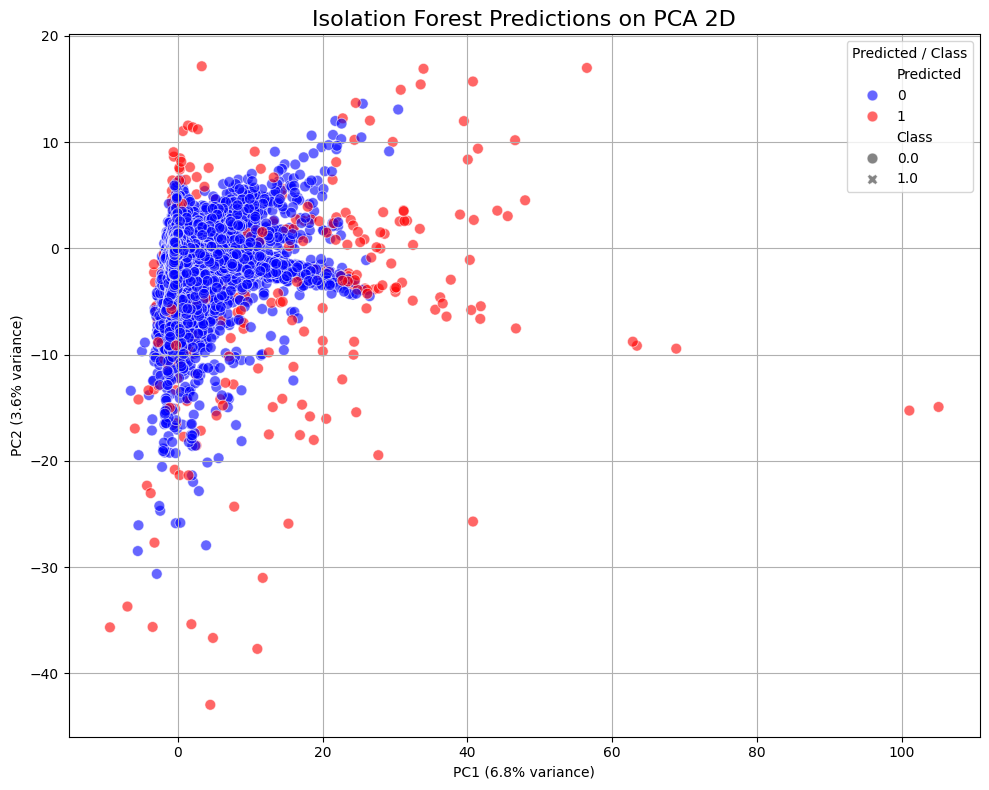

In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Class"] = y_true
pca_df["Predicted"] = y_pred

plt.figure(figsize=(10,8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Predicted",       # show predicted anomalies
    style="Class",         # show actual class
    palette={0: "blue", 1: "red"},
    data=pca_df,
    alpha=0.6,
    s=60
)
plt.title("Isolation Forest Predictions on PCA 2D", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="Predicted / Class", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'accuracy_score' is not defined